In [1]:
import pandas as pd
alldata = pd.read_csv('all_Data_newest_more_features_pisa.csv',encoding='gbk')
alldata['new编号'] = alldata['编号'].apply(lambda x: int(x[-1])+1) 

from pycaret.classification import *
import random
random.seed(798)
a=setup(alldata,'label',train_size=0.65, feature_interaction=True,feature_ratio=True,normalize=True,fix_imbalance=True,ignore_features=['编号'],session_id=0)

,Description,Value
0,session_id,0
1,Target,label
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(839, 30)"
5,Missing Values,False
6,Numeric Features,27
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [17]:
rf = create_model('lightgbm')
rf = tune_model(rf, optimize='Accuracy',choose_better=True,round=3,n_iter = 100)
rf = tune_model(rf, optimize='F1',choose_better=True,round=3,n_iter = 50)
rf = tune_model(rf, optimize='Accuracy',choose_better=True,round=3,n_iter = 100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.964,0.980,0.923,0.923,0.923,0.899,0.899
1,0.891,0.971,0.769,0.769,0.769,0.698,0.698
2,0.927,0.973,0.923,0.800,0.857,0.809,0.812
3,0.927,0.973,0.846,0.846,0.846,0.799,0.799
4,0.927,0.969,0.769,0.909,0.833,0.787,0.792
5,0.944,0.966,0.833,0.909,0.870,0.834,0.836
6,0.963,0.998,0.917,0.917,0.917,0.893,0.893
7,0.963,0.990,0.917,0.917,0.917,0.893,0.893
8,0.981,0.979,1.000,0.929,0.963,0.951,0.952
9,0.944,0.979,0.923,0.857,0.889,0.852,0.853


In [18]:
res=predict_model(rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9660,0.9843,0.9020,0.9020,0.9020,0.8814,0.8814


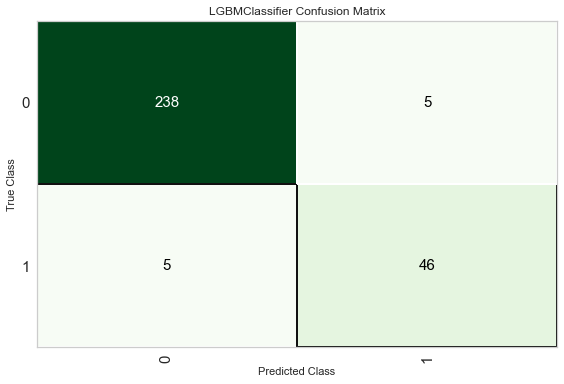

In [19]:
plot_model(rf, 'confusion_matrix')